In [1]:
from power import *
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import copy

## Flow DC VS AC

Converged in 3 iterations.


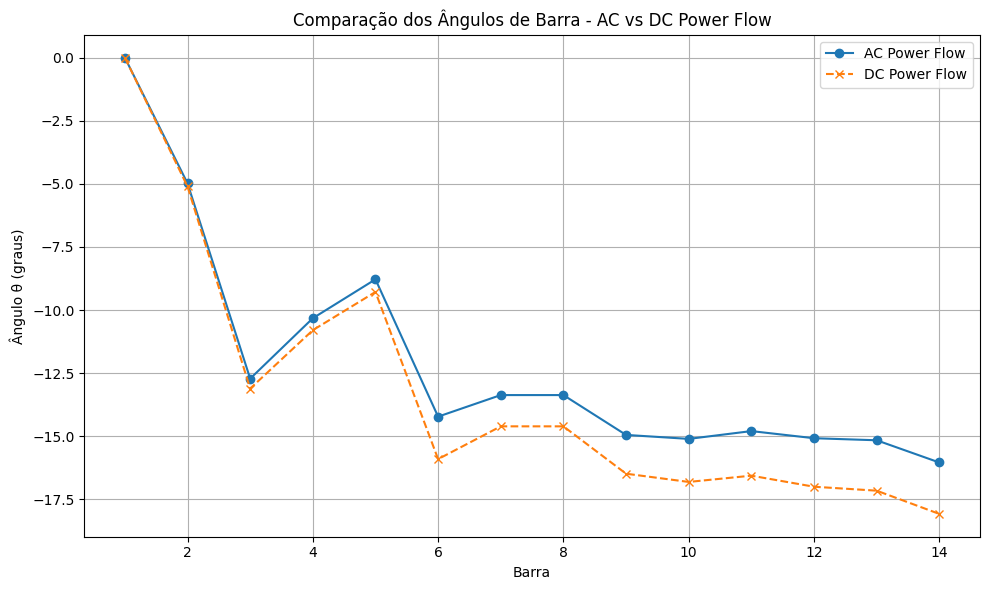

In [16]:
caminho = 'pwf_systems/IEEE14.pwf'
builder = PWF_Network_Builder(caminho)
net = builder.build_network()
solver = AC_PF(net)
solver.solve(verbose=False)
V = solver.V
theta_ac = solver.theta

solver_DC = DC_PF(net)
theta_dc = solver_DC.solve()


# Índice das barras (1, 2, 3, ...)
barras = np.arange(1, len(theta_ac) + 1)

# Plotando
plt.figure(figsize=(10, 6))
plt.plot(barras, theta_ac, marker='o', label='AC Power Flow')
plt.plot(barras, theta_dc, marker='x', linestyle='--', label='DC Power Flow')
plt.xlabel('Barra')
plt.ylabel('Ângulo θ (graus)')
plt.title('Comparação dos Ângulos de Barra - AC vs DC Power Flow')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# Comparação


Converged in 3 iterations.


c:\Users\gabri\miniconda3\envs\Otimizacao_IA\Lib\site-packages\matplotlib\cbook.py:1709: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
c:\Users\gabri\miniconda3\envs\Otimizacao_IA\Lib\site-packages\matplotlib\cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


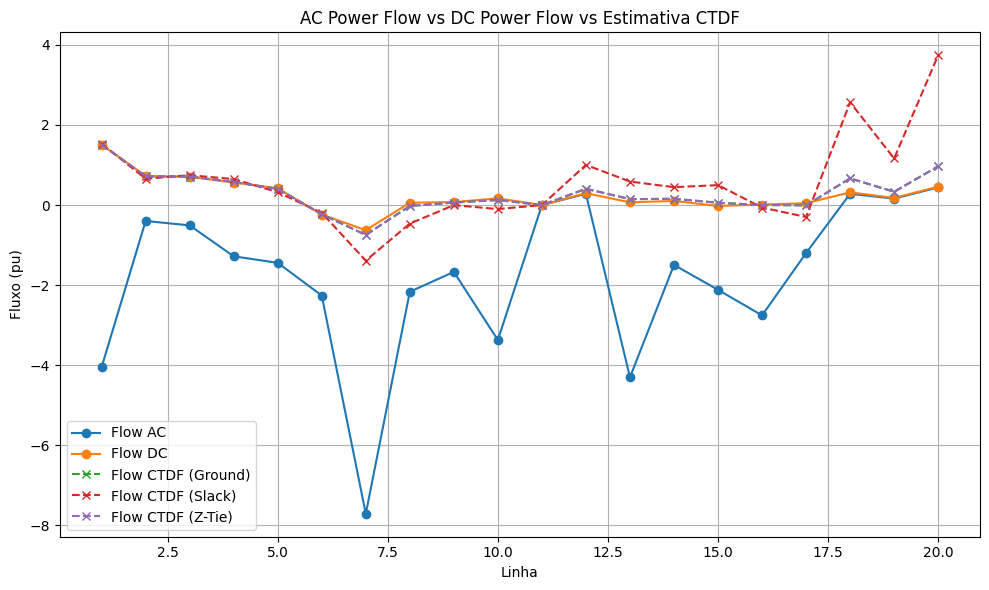

In [15]:
caminho = 'pwf_systems/IEEE14.pwf'
builder = PWF_Network_Builder(caminho)

#Rede:
net = builder.build_network()

# Rede AC e DC:
net_AC = copy.deepcopy(net)
net_DC = copy.deepcopy(net)

#Solvers para AC e DC Power Flow:
solver_AC = AC_PF(net_AC)
solver_DC = DC_PF(net_DC)

# Resolvendo o fluxo de potência AC e DC:
solver_AC.solve(verbose=False)
solver_DC.solve()

# Obtendo os fluxos de linha para AC e DC Power Flow:
flow_AC = solver_AC.get_line_flows()
flow_DC = solver_DC.get_line_flows()

# Estimativa de fluxos de linha usando CTDF:
P = [net.buses[i].p for i in range(len(net_DC.buses))]
# CTDF com referencia ao terra:
T = net_DC.CTDF()
flow_CTDF_ground = T @ P
# CTDF com referencia a barra slack:
T = net_DC.CTDF(ref_bus=net_DC.buses[0])
flow_CTDF_slack = T @ P
# CTDF com impedância do laço de ligação:
T = net_DC.CTDF(ref_bus=net_DC.buses[0], z_tie=1j)
flow_CTDF_ztie = T @ P

# Índice das barras (1, 2, 3, ...)
linhas = np.arange(1, len(net_DC.lines) + 1)

# Plotando
plt.figure(figsize=(10, 6))
plt.plot(linhas, flow_AC, marker='o', label='Flow AC')
plt.plot(linhas, flow_DC, marker='o', label='Flow DC')
plt.plot(linhas, flow_CTDF, marker='x', linestyle='--', label='Flow CTDF (Ground)')
plt.plot(linhas, flow_CTDF_slack, marker='x', linestyle='--', label='Flow CTDF (Slack)')
plt.plot(linhas, flow_CTDF_ztie, marker='x', linestyle='--', label='Flow CTDF (Z-Tie)')
plt.xlabel('Linha')
plt.ylabel('Fluxo (pu)')
plt.title('AC Power Flow vs DC Power Flow vs Estimativa CTDF')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()